In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
solid_water=[]
class PH:
    def __init__(self,ph,hardness,solids):
        self.ph=ph
        self.hardness=hardness
        self.solids=solids
        
    def getPotability(self):
        if ((self.ph >6.5 and self.ph<=8.5) and self.hardness<=100 and self.solids<10000):
            print("it is hard")
        else:
            print("it is not hard")

In [3]:
hard=PH(9,29,1)
solid_water.append(hard)
hard.ph
hard.getPotability()

it is not hard


In [4]:
df=pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [89]:
df.loc[:,['ph','Hardness']]

,ph,Hardness
0,NaN,204.890455
1,3.716080,129.422921
2,8.099124,224.236259
3,8.316766,214.373394
4,9.092223,181.101509
...,...,...
3271,4.668102,193.681735
3272,7.808856,193.553212
3273,9.419510,175.762646
3274,5.126763,230.603758


In [5]:
df.index

RangeIndex(start=0, stop=3276, step=1)

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<AxesSubplot:>

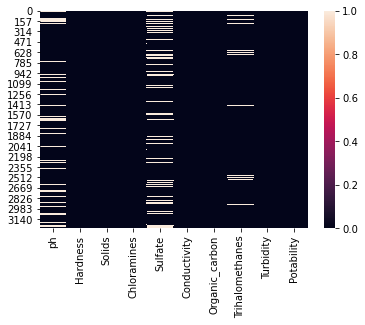

In [8]:
sns.heatmap(df.isnull())

## pH

In [9]:
safe_to_drink=df.loc[df['Potability']==1,'ph']
Not_safe_to_drink=df.loc[df['Potability']==0,'ph']
safe_to_drink=safe_to_drink.dropna()
Not_safe_to_drink=Not_safe_to_drink.dropna()

In [10]:
len(Not_safe_to_drink)

1684

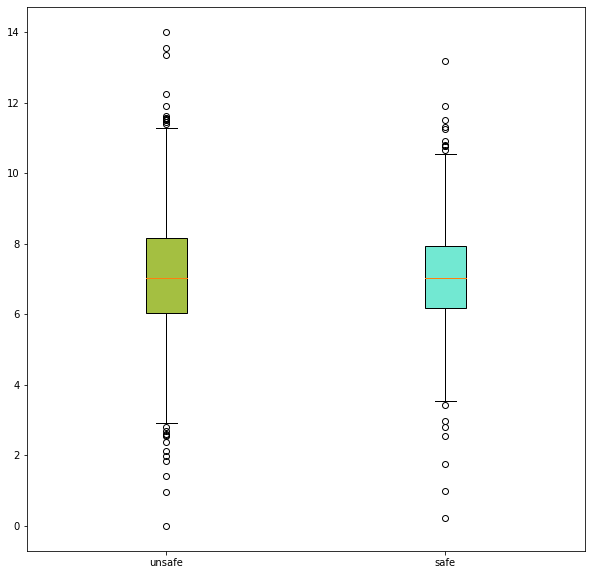

In [11]:
colors= ['#a4bf41','#72e8d2']
 
plt.figure(figsize=(10,10))
plt.subplot(1,1,1)
pt=plt.boxplot([Not_safe_to_drink,safe_to_drink],labels=['unsafe','safe'],patch_artist=True)
for patch,color in zip(pt['boxes'],colors):
    patch.set_facecolor(color)
plt.show()

Text(0, 0.5, 'count')

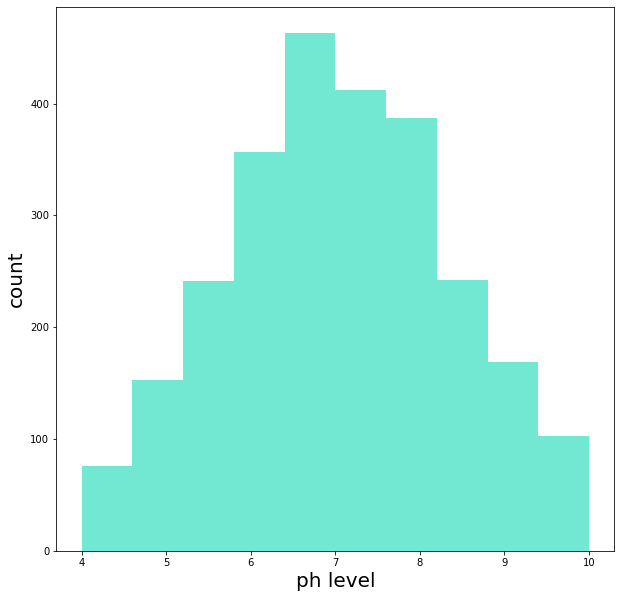

In [12]:
plt.figure(figsize=(10,10))
style_dict={
    "animated":True,
    "fontsize":20
}
ticks=np.arange(2,8)
bars=plt.hist(x=df['ph'],color={"#72e8d2"},range=(4,10))
plt.xlabel("ph level",fontdict=style_dict)
plt.ylabel("count",fontdict=style_dict)

<AxesSubplot:xlabel='ph'>

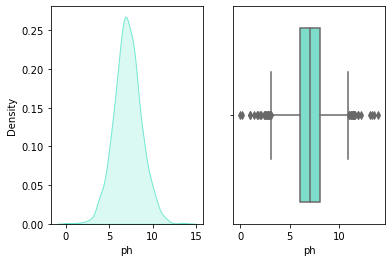

In [13]:
plt.subplot(121)
sns.kdeplot(x=df['ph'],fill=True,color='#72e8d2')
plt.subplot(122)
sns.boxplot(x=df['ph'],color='#72e8d2',saturation=0.8)

In [14]:
ph_max_outliers=df['ph'].mean()+3*df['ph'].std()
ph_max_outliers
ph_min_outliers=df['ph'].mean()-3*df['ph'].std()
ph_min_outliers

2.297835948150383

In [15]:
ph_max_outliers

11.863753060403255

In [16]:
df.loc[df['ph']>ph_max_outliers,'ph'].count()

7

## Hardness

In [17]:
safe_to_drink_h=df.loc[df['Potability']==1,'Hardness']
Not_safe_to_drink_h=df.loc[df['Potability']==0,'Hardness']
safe_to_drink_h=safe_to_drink_h.dropna()
Not_safe_to_drink_h=Not_safe_to_drink_h.dropna()

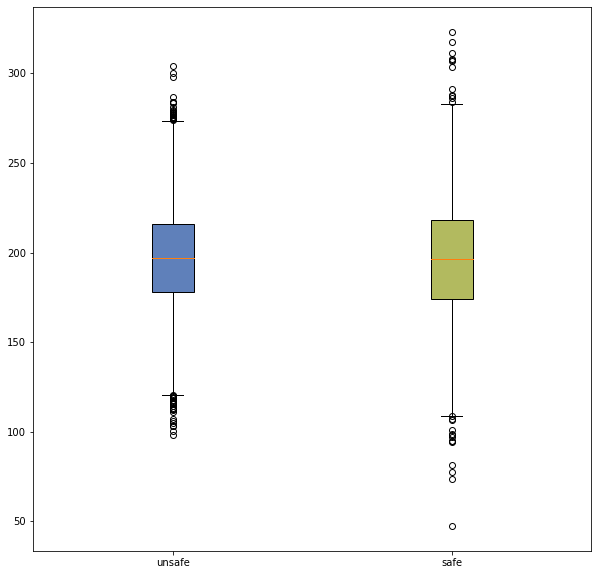

In [18]:
colors= ['#5f80ba','#b2ba5f']
 
plt.figure(figsize=(10,10))
plt.subplot(1,1,1)
pt=plt.boxplot([Not_safe_to_drink_h,safe_to_drink_h],labels=['unsafe','safe'],patch_artist=True)
for patch,color in zip(pt['boxes'],colors):
    patch.set_facecolor(color)
plt.show()

Text(0, 0.5, 'count')

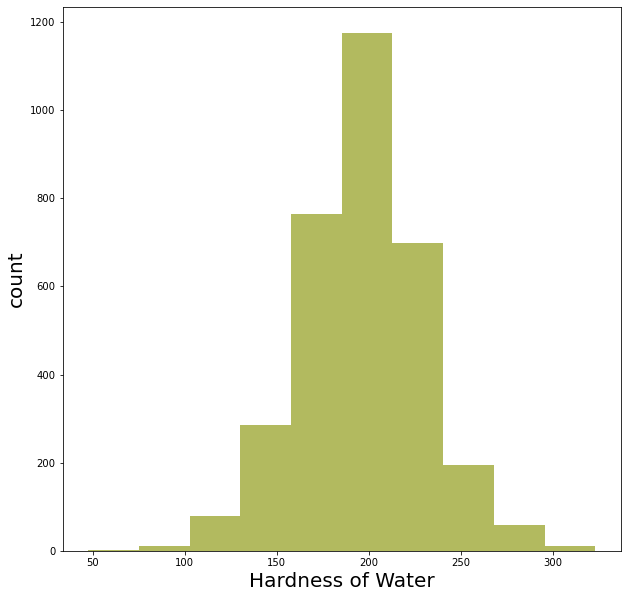

In [19]:
plt.figure(figsize=(10,10))
style_dict={
    "animated":True,
    "fontsize":20
}
ticks=np.arange(2,8)
bars=plt.hist(x=df['Hardness'],color={"#b2ba5f"})
plt.xlabel("Hardness of Water",fontdict=style_dict)
plt.ylabel("count",fontdict=style_dict)

<AxesSubplot:xlabel='Hardness'>

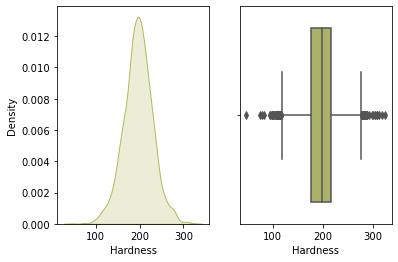

In [20]:
plt.subplot(121)
sns.kdeplot(x=df['Hardness'],fill=True,color='#b2ba5f')
plt.subplot(122)
sns.boxplot(x=df['Hardness'],color='#b2ba5f',saturation=0.8)

# Selecting Features

<AxesSubplot:>

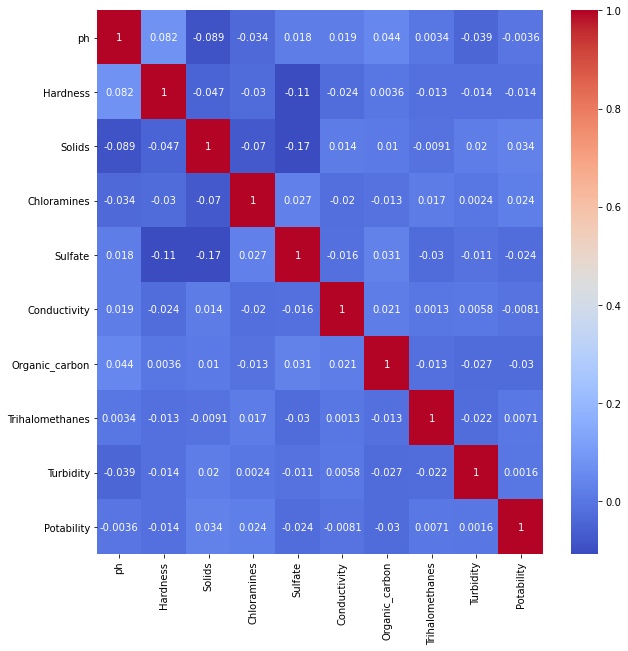

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm',robust=True)

### Calculating Variance Threshold

In [25]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold()
vt.fit_transform(df_knn)
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [26]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [27]:
df_knn.columns[vt.get_support()]

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [28]:
## we can see that there are no constant columns(They dont have 0 variance)
constant_column=[column for column in df_knn.columns if column not in df_knn.columns[vt.get_support()]]
constant_column

[]

### Calculating mutual info gain

<AxesSubplot:>

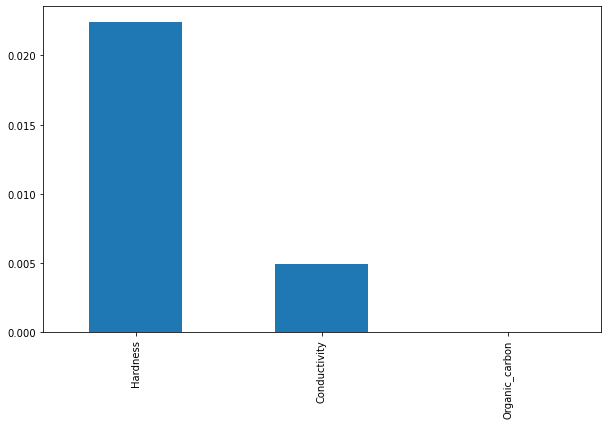

In [33]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,y_train)

mutual_info=pd.Series(mutual_info,index=X_train.columns)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10,6))

##  Filling missing values

In [22]:
from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors=2)
impute.fit_transform(df)

array([[6.00742683e+00, 2.04890455e+02, 2.07913190e+04, ...,
        8.69909705e+01, 2.96313538e+00, 0.00000000e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        5.63290763e+01, 4.50065627e+00, 0.00000000e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        6.64200925e+01, 3.05593375e+00, 0.00000000e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        6.98454003e+01, 3.29887550e+00, 1.00000000e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        7.74882131e+01, 4.70865847e+00, 1.00000000e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        7.86984463e+01, 2.30914906e+00, 1.00000000e+00]])

In [34]:
df_knn=pd.DataFrame(impute.fit_transform(df),columns=df.columns)
df_knn

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.007427,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,326.479827,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,357.947334,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,355.544770,392.449580,19.903225,46.827049,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,321.930158,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,338.733772,402.883113,11.168946,77.488213,4.708658,1.0


In [100]:
df_knn['Organic_carbon'].max()

28.30000000000001

In [35]:
X=df_knn.loc[:,['Organic_carbon','Conductivity','Hardness']]
X

,Organic_carbon,Conductivity,Hardness
0,10.379783,564.308654,204.890455
1,15.180013,592.885359,129.422921
2,16.868637,418.606213,224.236259
3,18.436524,363.266516,214.373394
4,11.558279,398.410813,181.101509
...,...,...,...
3271,13.894419,526.424171,193.681735
3272,19.903225,392.449580,193.553212
3273,11.039070,432.044783,175.762646
3274,11.168946,402.883113,230.603758


In [36]:
df_knn.iloc[:,-1]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3271    1.0
3272    1.0
3273    1.0
3274    1.0
3275    1.0
Name: Potability, Length: 3276, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,df_knn.iloc[:,-1],test_size=0.30,random_state=2)

In [39]:
y_train

622     0.0
2366    1.0
827     0.0
826     0.0
2476    0.0
       ... 
2347    1.0
1608    1.0
2541    0.0
2575    0.0
3240    1.0
Name: Potability, Length: 2293, dtype: float64

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=10)]

max_features=['auto','sqrt','log2']

max_depth=[int(x) for x in np.linspace(100,1000,100)]

min_samples_split=[2,3,5,6]
min_samples_leaf=[2,3,4,6]

random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'criterion':["gini", "entropy"],
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)


{'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'max_depth': [100, 109, 118, 127, 136, 145, 154, 163, 172, 181, 190, 200, 209, 218, 227, 236, 245, 254, 263, 272, 281, 290, 300, 309, 318, 327, 336, 345, 354, 363, 372, 381, 390, 400, 409, 418, 427, 436, 445, 454, 463, 472, 481, 490, 500, 509, 518, 527, 536, 545, 554, 563, 572, 581, 590, 600, 609, 618, 627, 636, 645, 654, 663, 672, 681, 690, 700, 709, 718, 727, 736, 745, 754, 763, 772, 781, 790, 800, 809, 818, 827, 836, 845, 854, 863, 872, 881, 890, 900, 909, 918, 927, 936, 945, 954, 963, 972, 981, 990, 1000], 'min_samples_split': [2, 3, 5, 6], 'min_samples_leaf': [2, 3, 4, 6]}


In [41]:
rf=RandomForestClassifier()
rf_model=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=10,verbose=2,
                            random_state=100)
rf_model.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END criterion=gini, max_depth=827, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1077; total time=   2.5s
[CV] END criterion=gini, max_depth=827, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1077; total time=   2.6s
[CV] END criterion=gini, max_depth=827, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1077; total time=   2.7s
[CV] END criterion=gini, max_depth=827, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1077; total time=   2.6s
[CV] END criterion=gini, max_depth=827, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1077; total time=   2.5s
[CV] END criterion=gini, max_depth=827, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1077; total time=   2.6s
[CV] END criterion=gini, max_depth=827, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimat

[CV] END criterion=entropy, max_depth=736, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=390, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=390, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=390, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=390, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=390, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=390, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END criterion=e

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [100, 109, 118, 127, 136,
                                                      145, 154, 163, 172, 181,
                                                      190, 200, 209, 218, 227,
                                                      236, 245, 254, 263, 272,
                                                      281, 290, 300, 309, 318,
                                                      327, 336, 345, 354, 363, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 5, 6],
                                        'n_estimators': [100, 222, 344, 466,
                   

In [42]:
best_rf_model=rf_model.best_estimator_
best_rf_model

RandomForestClassifier(criterion='entropy', max_depth=618, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=3,
                       n_estimators=1077)

In [43]:
rf_model.best_params_

{'n_estimators': 1077,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 618,
 'criterion': 'entropy'}

In [44]:
y_pred=best_rf_model.predict(X_test)

In [45]:
confusion_matrix(y_test,y_pred)

array([[512,  87],
       [328,  56]], dtype=int64)

In [46]:
print("the accuracy is {}".format(accuracy_score(y_test,y_pred)))

the accuracy is 0.5778229908443541


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.85      0.71       599
         1.0       0.39      0.15      0.21       384

    accuracy                           0.58       983
   macro avg       0.50      0.50      0.46       983
weighted avg       0.52      0.58      0.52       983



In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [rf_model.best_params_['max_depth']],
    'max_features': [rf_model.best_params_['max_features']],
    'min_samples_leaf': [rf_model.best_params_['min_samples_leaf']+1, 
                         rf_model.best_params_['min_samples_leaf']+2],
    
    'min_samples_split': [rf_model.best_params_['min_samples_split'] +1,
                          rf_model.best_params_['min_samples_split']+2,],
    
    'n_estimators': [rf_model.best_params_['n_estimators'] - 50, 
                     rf_model.best_params_['n_estimators'], 
                     rf_model.best_params_['n_estimators'] +50]
}

print(param_grid)

{'max_depth': [618], 'max_features': ['sqrt'], 'min_samples_leaf': [5, 6], 'min_samples_split': [4, 5], 'n_estimators': [1027, 1077, 1127]}


In [50]:
gs=GridSearchCV(estimator=rf,param_grid=param_grid,cv=2)
gs.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [618], 'max_features': ['sqrt'],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [4, 5],
                         'n_estimators': [1027, 1077, 1127]})

In [51]:
rf_gs_model=gs.best_estimator_

In [52]:
y_pred_gs=rf_gs_model.predict(X_test)

In [53]:
y_train_pred_gs=rf_gs_model.predict(X_train)

In [54]:
confusion_matrix(y_test,y_pred_gs)

array([[525,  74],
       [333,  51]], dtype=int64)

In [55]:
print("the accuracy(training) is {}".format(accuracy_score(y_train,y_train_pred_gs)))

the accuracy(training) is 0.8129088530309638


In [57]:
print("the accuracy(test)is {}".format(accuracy_score(y_test,y_pred_gs)))

the accuracy(test)is 0.5859613428280773


In [58]:
print(classification_report(y_test,y_pred_gs))

              precision    recall  f1-score   support

         0.0       0.61      0.88      0.72       599
         1.0       0.41      0.13      0.20       384

    accuracy                           0.59       983
   macro avg       0.51      0.50      0.46       983
weighted avg       0.53      0.59      0.52       983



## Automatic Hyperparameter tuning

In [59]:
from sklearn.model_selection import cross_val_score
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [63]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['sqrt','log2']),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0,0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 0.5),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }
space

{'criterion': <hyperopt.pyll.base.Apply at 0x1f69257dfa0>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x1f69257d280>,
 'max_features': <hyperopt.pyll.base.Apply at 0x1f69257da90>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x1f6925a3d90>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x1f6925a3af0>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x1f6925a3a90>}

In [64]:
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [65]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|███████████████████████████████████████████████| 80/80 [05:51<00:00,  4.39s/trial, best loss: -0.6101178753888746]


{'criterion': 1,
 'max_depth': 30.0,
 'max_features': 1,
 'min_samples_leaf': 0.31164126860906155,
 'min_samples_split': 0.14729784883845337,
 'n_estimators': 5}

In [66]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

gini
sqrt
1300


In [67]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

gini
sqrt
1300


In [68]:
trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_train,y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc5 = accuracy_score(y_test,predictionforest)

[[599   0]
 [384   0]]
0.6093591047812817
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       599
         1.0       0.00      0.00      0.00       384

    accuracy                           0.61       983
   macro avg       0.30      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983



C:\Users\sarth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Genetic Algorithm

In [70]:
from tpot import TPOTClassifier

In [81]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=10)]

max_features=['auto','sqrt','log2']

max_depth=[int(x) for x in np.linspace(100,1000,100)]

min_samples_split=[2,3,5,6]
min_samples_leaf=[2,3,4,6]


genetic_param={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [82]:
tpot_classifier=TPOTClassifier(generations=5, population_size=20,offspring_size= 12,
                                verbosity= 2,config_dict={"sklearn.ensemble.RandomForestClassifier":genetic_param}
                               ,early_stop= 12,scoring="accuracy",cv=4)

tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/80 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5952928227861187

Generation 2 - Current best internal CV score: 0.5952951031006196

Generation 3 - Current best internal CV score: 0.5952951031006196

Generation 4 - Current best internal CV score: 0.5952951031006196

Generation 5 - Current best internal CV score: 0.5952966233102869

Best pipeline: RandomForestClassifier(input_matrix, max_depth=845, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=711)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'max_depth': [100,
                                                                                      109,
                                                                                      118,
                                                                                      127,
                                                                                      136,
                                                                                      145,
                                                                                      154,
                                                                                      163,
                                                                                      172,
                                                                                      181,
                                                                                      190,

In [83]:
tpot_classifier.score(X_train,y_train)

0.814217182730048

In [84]:
tpot_classifier.score(X_test,y_test)

0.582909460834181

In [101]:
import pickle

In [103]:
pickle.dump(best_rf_model,open("water.pkl",'wb'))

## Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(n_clusters=4)
df['cluster']=kmeans.fit_predict(df[['Turbidity','Hardness']])

In [ ]:
df['cluster']

In [ ]:
centroids=kmeans.cluster_centers_
c_x=[i[0] for i in centroids]
c_y=[i[1] for i in centroids]

In [ ]:
c_x

In [ ]:
df['coids_x']=df['cluster'].map({0:c_x[0],1:c_x[1],2:c_x[2],3:c_x[3]})
df['coid_y']=df['cluster'].map({0:c_y[1],1:c_y[1],0:c_y[2],1:c_y[3]})

In [ ]:
centroids

In [ ]:
df['color']=df['cluster'].map({0:'red',1:'blue',2:'green',3:'yellow'})

In [ ]:
plt.scatter(df['Turbidity'],df['Hardness'],c=df['color'])
plt.xlabel("Turbidity")
plt.ylabel("Hardness")
plt.legend()

In [ ]:
sse=[]
k_values=range(1,100)
for i in k_values:
    kmeans1=KMeans(n_clusters=i)
    kmeans1.fit_predict(df[['Turbidity','Hardness']])
    sse.append(kmeans1.inertia_)

In [ ]:
plt.plot(k_values,sse)